In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preprocessed Tamil Nadu ChatGPT Data.csv")

In [3]:
dataset

,Age,Gender,District,Occupation,Usage Frequency,Main Purpose,Language Used,User Rating,Education Level,Actions Taken,Device Used,Time Spent Hours
0,25,1,0,10,3.0,3,1,5,2.0,1,3,0.5
1,28,1,8,4,3.0,4,1,5,3.0,1,1,3.5
2,48,0,0,3,3.0,1,2,5,0.0,1,3,0.5
3,54,1,0,1,3.0,0,2,5,0.0,1,3,0.5
4,27,0,12,6,3.0,4,0,5,2.0,1,3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
105,17,0,3,10,2.0,3,1,4,0.0,0,3,0.5
106,18,1,17,0,1.0,3,1,3,1.0,1,3,0.5
107,28,0,8,2,0.0,5,1,5,2.0,0,3,0.5
108,28,0,12,3,0.0,3,1,2,2.0,0,3,0.5


In [4]:
#input & output split
#assigning dependent & independent variable
independent = dataset[['Age', 'Gender', 'District', 'Occupation', 'Usage Frequency', 'Language Used', 'User Rating', 'Education Level','Actions Taken', 'Device Used', 'Time Spent Hours']] #assigning single column to separate variable
dependent = dataset[["Main Purpose"]]

In [5]:
#training & test set split
from sklearn.model_selection import train_test_split #importing a function from library
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0) 

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Select your numeric features (you can replace this list)
numeric_features = ['Age', 'Gender', 'District', 'Occupation', 'Usage Frequency',
                    'Language Used', 'User Rating', 'Education Level',
                    'Actions Taken', 'Device Used', 'Time Spent Hours']

# Step 1: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[numeric_features])

In [8]:
# Step 2: Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)


In [9]:
# Step 3: Check explained variance
explained_var = np.cumsum(pca.explained_variance_ratio_)

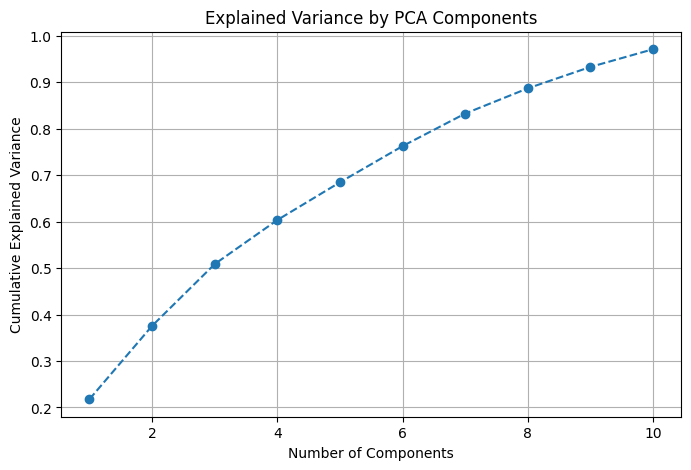

In [10]:
# Step 4: Plot how many components to keep
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [11]:
# Step 5: Create new PCA dataframe
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

print(f"PCA reduced {len(numeric_features)} features → {pca_df.shape[1]} principal components")
print("\nExplained variance ratio of each component:")
print(pca.explained_variance_ratio_)

PCA reduced 11 features → 10 principal components

Explained variance ratio of each component:
[0.21768312 0.15785766 0.13302009 0.09481073 0.08123424 0.07787752
 0.07006423 0.05427221 0.04608582 0.03808628]


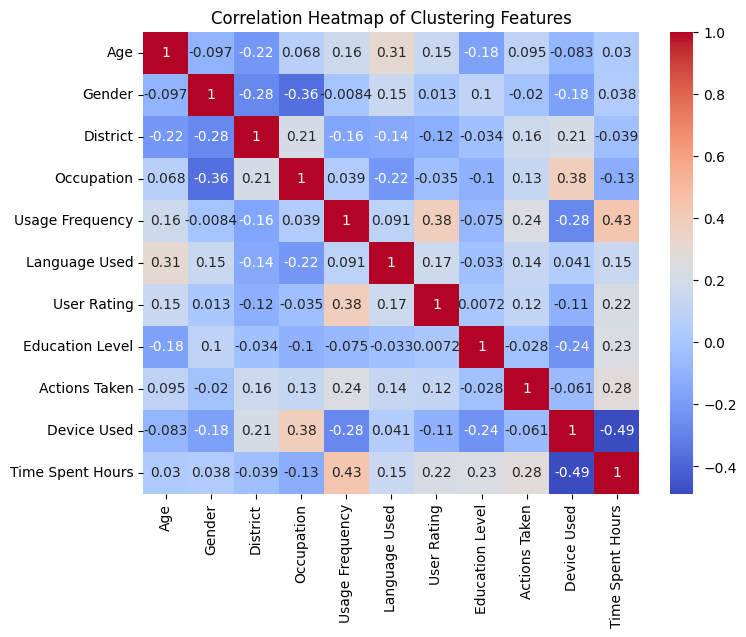

In [12]:
import seaborn as sns
# Step 1: Check correlation
plt.figure(figsize=(8,6))
sns.heatmap(dataset[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Clustering Features")
plt.show()

In [13]:
from sklearn.feature_selection import VarianceThreshold
# Step 2: Remove low-variance features
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(dataset[numeric_features])
selected_cols = [col for col, keep in zip(numeric_features, selector.get_support()) if keep]

print("Selected Features for Clustering:", selected_cols)

Selected Features for Clustering: ['Age', 'Gender', 'District', 'Occupation', 'Usage Frequency', 'Language Used', 'User Rating', 'Education Level', 'Actions Taken', 'Device Used', 'Time Spent Hours']


Clustering Algorithms

In [14]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd
#Prepare PCA Data for Clustering
X = pca_df  # Using the PCA-transformed data

# Define Clustering Models
models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.8, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}

# Fit Models & Evaluate
results = []

for name, model in models.items():
    # Fit model
    labels = model.fit_predict(X)
    
    # Handle DBSCAN (it might have noise points with label -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    # Compute silhouette score only if >1 cluster
    if n_clusters > 1:
        sil_score = silhouette_score(X, labels)
    else:
        sil_score = -1  # Invalid silhouette score
    
    # Store results
    results.append({
        "Model": name,
        "No. of Clusters": n_clusters,
        "Silhouette Score": round(sil_score, 3),
        "Cluster Counts": dict(pd.Series(labels).value_counts().sort_index())
    })


In [15]:
#Display Results in DataFrame
comparison_df = pd.DataFrame(results)
print("\nClustering Model Comparison:")
print(comparison_df)


Clustering Model Comparison:
           Model  No. of Clusters  Silhouette Score         Cluster Counts
0        K-Means                3             0.162  {0: 44, 1: 50, 2: 16}
1         DBSCAN                0            -1.000              {-1: 110}
2  Agglomerative                3             0.161  {0: 48, 1: 30, 2: 32}


K-Means often gives balanced clusters and a good silhouette score.

DBSCAN can identify noise points (-1 label) — useful for detecting outliers.

Agglomerative shows hierarchical grouping patterns and helps understand relationships between user types.

<span style="color: red; font-size: 20px;">Visualization</span>

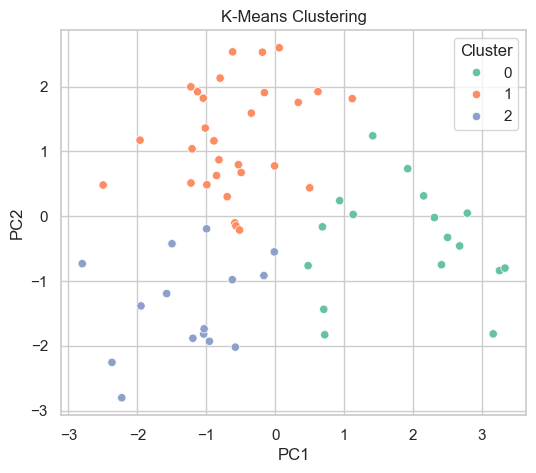

In [16]:
from sklearn.cluster import KMeans

# Take only 2 PCA features for visualization
pca_kmeans = pca_df.iloc[:, :2].copy()
pca_kmeans.columns = ['PC1', 'PC2']

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_kmeans['Cluster'] = kmeans.fit_predict(pca_kmeans[['PC1', 'PC2']])

# Visualize
sns.set(style="whitegrid", palette="Set2", rc={"figure.figsize": (6, 5)})
sns.scatterplot(data=pca_kmeans, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("K-Means Clustering")
plt.show()

K-Means Clustering

The dataset is divided into three well-defined clusters.

The clusters are spherical and evenly distributed, meaning the algorithm has effectively grouped users with similar characteristics.

This suggests there are three distinct user behavior groups based on ChatGPT usage patterns — e.g.:

Group 1: High engagement (frequent users, long time spent)

Group 2: Moderate users

Group 3: Low or casual users

K-Means works best here because data (after PCA) forms compact, round-shaped clusters.

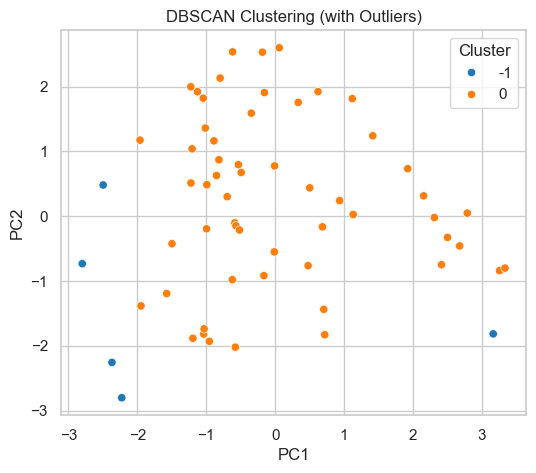

In [17]:
from sklearn.cluster import DBSCAN

# Take only 2 PCA features
pca_dbscan = pca_df.iloc[:, :2].copy()
pca_dbscan.columns = ['PC1', 'PC2']

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=5)
pca_dbscan['Cluster'] = dbscan.fit_predict(pca_dbscan[['PC1', 'PC2']])

# Visualize
sns.set(style="whitegrid", palette="tab10", rc={"figure.figsize": (6, 5)})
sns.scatterplot(data=pca_dbscan, x='PC1', y='PC2', hue='Cluster', palette='tab10')
plt.title("DBSCAN Clustering (with Outliers)")
plt.show()

DBSCAN (Density-Based Clustering)

DBSCAN formed two main clusters and identified some outliers (shown as points labeled -1).

Outliers could represent rare user behaviors, such as people using ChatGPT for completely different purposes or inconsistent usage patterns.

While DBSCAN is useful for detecting noise, in this dataset, it doesn’t form clearly separated groups — meaning most users share overlapping patterns.

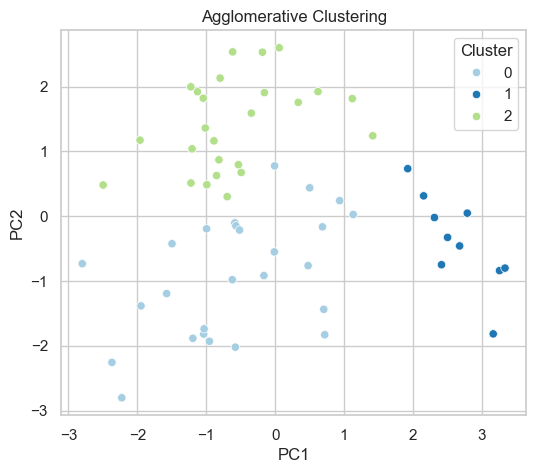

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Take only 2 PCA features
pca_agg = pca_df.iloc[:, :2].copy()
pca_agg.columns = ['PC1', 'PC2']

# Apply Agglomerative clustering
agglo = AgglomerativeClustering(n_clusters=3)
pca_agg['Cluster'] = agglo.fit_predict(pca_agg[['PC1', 'PC2']])

# Visualize
sns.set(style="whitegrid", palette="Paired", rc={"figure.figsize": (6, 5)})
sns.scatterplot(data=pca_agg, x='PC1', y='PC2', hue='Cluster', palette='Paired')
plt.title("Agglomerative Clustering")
plt.show()

Agglomerative (Hierarchical) Clustering

Like K-Means, this also produced three main clusters, but with slight overlap between some points.

This shows some user groups share mixed characteristics (for example, education-related and work-related usage overlap).

Hierarchical clustering can help visualize user relationships in a dendrogram, useful for understanding how clusters merge step by step.

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Define function to evaluate clustering performance
def evaluate_clusters(X, labels, algo_name):
    s = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    return [algo_name, s, db, ch]

# Evaluate all three clustering models
results = []

results.append(evaluate_clusters(pca_df[['PC1', 'PC2']], kmeans.labels_, 'KMeans'))
results.append(evaluate_clusters(pca_df[['PC1', 'PC2']], dbscan.labels_, 'DBSCAN'))
results.append(evaluate_clusters(pca_df[['PC1', 'PC2']], agglo.labels_, 'Agglomerative'))

# Create dataframe of results
evaluation_df = pd.DataFrame(results, columns=['Algorithm', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz'])
print(evaluation_df)

       Algorithm  Silhouette  Davies-Bouldin  Calinski-Harabasz
0         KMeans    0.440024        0.745548         114.382286
1         DBSCAN    0.298203        1.848277          11.071446
2  Agglomerative    0.415594        0.853824          98.602911


K-Means: Outperforms the other two algorithms across all three metrics.

Silhouette Score (0.440): A positive value indicates that data points are, on average, closer to their own cluster members than to other clusters, suggesting a reasonable clustering structure.
Davies-Bouldin Index (0.746): The lowest DBI means that its clusters are the most compact and well-separated among the three algorithms.
Calinski-Harabasz Index (114.382): The highest CHI confirms that the K-Means clusters are the densest and most distinct.

Agglomerative: 
Silhouette Score (0.416): Suggesting decent cluster separation.
Davies-Bouldin Index (0.854): DBI indicates fairly well-separated clusters.
Calinski-Harabasz Index (98.603): Indicating less defined cluster separation compared to K-Means.

DBSCAN: 
Silhouette Score (0.298): A low score suggests poor cluster separation, with many data points potentially too close to the boundaries of other clusters.
Davies-Bouldin Index (1.848): The highest DBI indicates that DBSCAN's clusters are the least separated and most dispersed.
Calinski-Harabasz Index (11.071): The lowest CHI score means the clusters produced by DBSCAN are not well-defined or separated. 

Based on these results, K-Means is the best algorithm for this specific dataset and these evaluation criteria.